In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import scipy.io
from sklearn.decomposition import PCA
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


## Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

### Dataset de Coactivation matrix

- Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
- Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

In [3]:
path_coact = scipy.io.loadmat('/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/coactivation_matrix/Coactivation_matrix.mat')
df_coact = pd.DataFrame(path_coact['Coactivation_matrix'])
df_coact 

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


In [4]:
path_coact

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

In [5]:
df_coact.head

<bound method NDFrame.head of           0         1         2         3         4        5         6    \
0    0.000000  0.160714  0.111486  0.000000  0.138095  0.00000  0.000000   
1    0.160714  0.000000  0.068259  0.000000  0.042056  0.00000  0.000000   
2    0.111486  0.068259  0.000000  0.224199  0.000000  0.00000  0.000000   
3    0.000000  0.000000  0.224199  0.000000  0.000000  0.00000  0.039275   
4    0.138095  0.042056  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
633  0.053872  0.042105  0.161905  0.000000  0.000000  0.00000  0.000000   
634  0.049383  0.000000  0.103943  0.075697  0.000000  0.03876  0.000000   
635  0.000000  0.000000  0.034130  0.108787  0.000000  0.00000  0.105839   
636  0.050459  0.000000  0.000000  0.000000  0.103448  0.00000  0.000000   
637  0.101124  0.069231  0.000000  0.000000  0.053279  0.00000  0.000000   

          7    8         9    ...  628       629  630  63

In [6]:
X_std_coact = StandardScaler().fit_transform(df_coact)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_std_coact)

/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [7]:
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(X_std_coact)
    inertia.append(kmeans.inertia_)

/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sabri

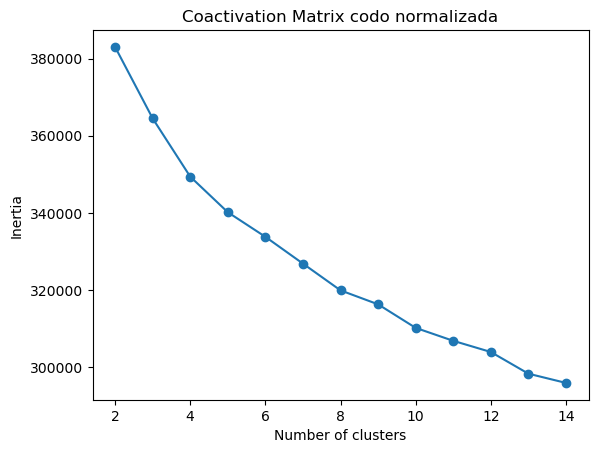

In [8]:
plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Coactivation Matrix codo normalizada')
plt.show()  

In [9]:
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters, n_init='auto')
    kmeans.fit(df_coact)
    inertia.append(kmeans.inertia_)

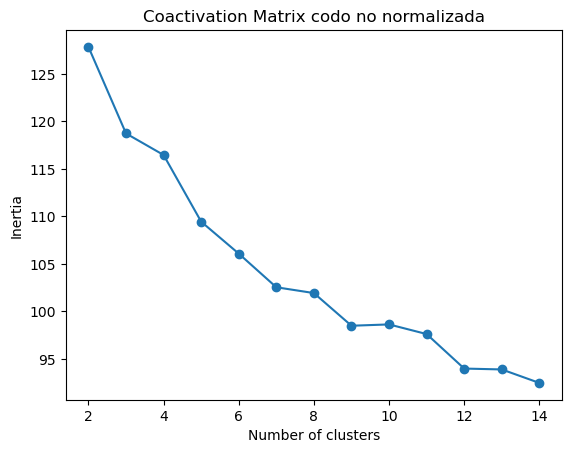

In [10]:
plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Coactivation Matrix codo no normalizada')
plt.show()  

In [11]:
gm = GaussianMixture(n_components=5).fit(X_std_coact)
labels = gm.predict(X_std_coact)
df_std_coact = pd.DataFrame(data=X_std_coact, columns=df_coact.columns)
df_std_coact['Gaussian'] = labels
df_std_coact 


,0,1,2,3,4,5,6,7,8,9,...,629,630,631,632,633,634,635,636,637,Gaussian
0,-0.193629,12.058631,6.573996,-0.199893,10.876733,-0.274422,-0.359765,-0.430826,-0.169762,1.663841,...,-0.458897,-0.446382,-0.301641,9.779352,3.090867,3.753126,-0.238532,3.927416,5.663105,3
1,10.558258,-0.178466,3.944309,-0.199893,3.183226,-0.274422,-0.359765,-0.430826,-0.169762,1.789071,...,-0.458897,-0.446382,-0.301641,7.342167,2.366442,-0.175429,-0.238532,-0.144780,3.803630,3
2,7.264887,5.018936,-0.208198,14.444571,-0.185803,-0.274422,-0.359765,1.637236,-0.169762,-0.261564,...,1.183606,-0.446382,-0.301641,-0.195015,9.741918,8.093545,2.396701,-0.144780,-0.232791,3
3,-0.193629,-0.178466,13.430792,-0.199893,-0.185803,-0.274422,1.477426,1.448978,-0.169762,-0.261564,...,1.240800,-0.446382,-0.301641,-0.195015,-0.225775,5.846529,8.161136,-0.144780,-0.232791,3
4,9.045030,3.023765,-0.208198,-0.199893,-0.185803,-0.274422,-0.359765,-0.430826,-0.169762,-0.261564,...,-0.458897,-0.446382,-0.301641,3.985061,-0.225775,-0.175429,-0.238532,8.203861,2.873562,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,3.410445,3.027510,9.641153,-0.199893,-0.185803,-0.274422,-0.359765,2.412250,-0.169762,2.607925,...,1.161911,-0.446382,-0.301641,4.770668,-0.225775,15.474387,6.807461,-0.144780,-0.232791,3
634,3.110106,-0.178466,6.115073,4.744570,-0.185803,1.995252,-0.359765,-0.430826,-0.169762,-0.261564,...,0.694156,-0.446382,-0.301641,3.434570,11.885404,-0.175429,8.382263,-0.144780,-0.232791,3
635,-0.193629,-0.178466,1.868055,6.905935,-0.185803,-0.274422,4.591159,2.854506,-0.169762,-0.261564,...,1.410356,-0.446382,-0.301641,-0.195015,5.392339,8.706728,-0.238532,-0.144780,-0.232791,3
636,3.182091,-0.178466,-0.208198,-0.199893,8.101233,-0.274422,-0.359765,-0.430826,-0.169762,2.357627,...,-0.458897,-0.446382,-0.301641,3.560055,-0.225775,-0.175429,-0.238532,-0.144780,5.468031,3


In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_std_coact)
centros = kmeans.cluster_centers_
etiquetas = kmeans.labels_
iteraciones = kmeans.n_iter_

print("Centros de clusters:\n", centros)
print("Etiquetas:\n", etiquetas)
print("Número de iteraciones:", iteraciones)


df_std_coact=pd.DataFrame(data = X_std_coact, columns = df_coact.columns)
df_std_coact['kmeans'] = etiquetas
print(df_std_coact.head(3))
df_std_coact

/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centros de clusters:
 [[-0.19362938 -0.10108606 -0.20819832 ... -0.23853185 -0.14477987
  -0.2327912 ]
 [-0.16410708 -0.17846608  0.19663826 ...  0.1532273  -0.14477987
  -0.2327912 ]
 [ 0.15861404  0.14536971  0.03788836 ... -0.06336595  0.10683623
   0.19356976]
 [-0.19362938 -0.17846608 -0.07822356 ...  0.41332367 -0.07425387
  -0.2327912 ]
 [-0.19362938 -0.17846608 -0.20819832 ... -0.23853185 -0.14477987
  -0.20465567]]
Etiquetas:
 [2 2 2 2 2 3 3 1 2 2 2 2 3 2 2 2 1 2 3 1 3 2 2 2 2 2 2 4 4 4 4 4 2 4 4 4 2
 3 1 3 1 3 1 3 1 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 1 1 2 1 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 1 2 2 1 1 1 2 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 3 4 4 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 4 4 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 1 3 1 3 2 1 2 3 3 0 3 2 4 4 4 4 4 2 4 2 4 4 4 4 2 2 2 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 

,0,1,2,3,4,5,6,7,8,9,...,629,630,631,632,633,634,635,636,637,kmeans
0,-0.193629,12.058631,6.573996,-0.199893,10.876733,-0.274422,-0.359765,-0.430826,-0.169762,1.663841,...,-0.458897,-0.446382,-0.301641,9.779352,3.090867,3.753126,-0.238532,3.927416,5.663105,2
1,10.558258,-0.178466,3.944309,-0.199893,3.183226,-0.274422,-0.359765,-0.430826,-0.169762,1.789071,...,-0.458897,-0.446382,-0.301641,7.342167,2.366442,-0.175429,-0.238532,-0.144780,3.803630,2
2,7.264887,5.018936,-0.208198,14.444571,-0.185803,-0.274422,-0.359765,1.637236,-0.169762,-0.261564,...,1.183606,-0.446382,-0.301641,-0.195015,9.741918,8.093545,2.396701,-0.144780,-0.232791,2
3,-0.193629,-0.178466,13.430792,-0.199893,-0.185803,-0.274422,1.477426,1.448978,-0.169762,-0.261564,...,1.240800,-0.446382,-0.301641,-0.195015,-0.225775,5.846529,8.161136,-0.144780,-0.232791,2
4,9.045030,3.023765,-0.208198,-0.199893,-0.185803,-0.274422,-0.359765,-0.430826,-0.169762,-0.261564,...,-0.458897,-0.446382,-0.301641,3.985061,-0.225775,-0.175429,-0.238532,8.203861,2.873562,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,3.410445,3.027510,9.641153,-0.199893,-0.185803,-0.274422,-0.359765,2.412250,-0.169762,2.607925,...,1.161911,-0.446382,-0.301641,4.770668,-0.225775,15.474387,6.807461,-0.144780,-0.232791,2
634,3.110106,-0.178466,6.115073,4.744570,-0.185803,1.995252,-0.359765,-0.430826,-0.169762,-0.261564,...,0.694156,-0.446382,-0.301641,3.434570,11.885404,-0.175429,8.382263,-0.144780,-0.232791,2
635,-0.193629,-0.178466,1.868055,6.905935,-0.185803,-0.274422,4.591159,2.854506,-0.169762,-0.261564,...,1.410356,-0.446382,-0.301641,-0.195015,5.392339,8.706728,-0.238532,-0.144780,-0.232791,2
636,3.182091,-0.178466,-0.208198,-0.199893,8.101233,-0.274422,-0.359765,-0.430826,-0.169762,2.357627,...,-0.458897,-0.446382,-0.301641,3.560055,-0.225775,-0.175429,-0.238532,-0.144780,5.468031,2


/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


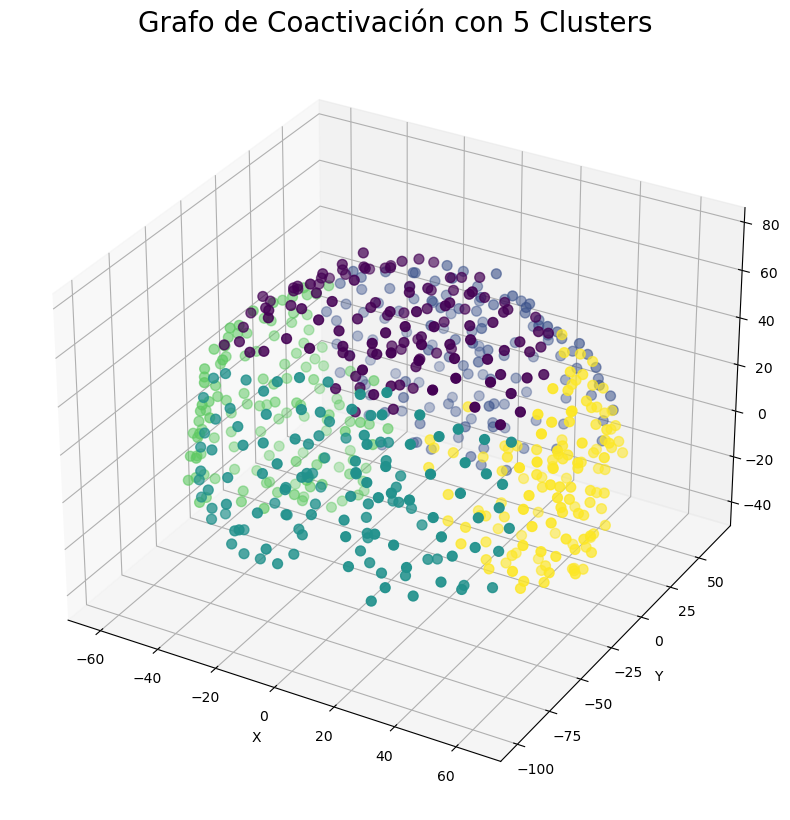

Animación guardada como 'grafo_animado.gif'


In [13]:
matrix = path_coact['Coactivation_matrix']  # Matriz de coactivación
coords = path_coact['Coord']
x, y, z = coords[:, 0], coords[:, 1], coords[:, 2]

# crear el grafo 
grafo = nx.from_numpy_array(matrix)

# 5 clusters 
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(coords)

# plot 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', s=50, marker='o')


ax.set_title('Grafo de Coactivación con 5 Clusters', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# girar
def update(frame):
    ax.view_init(elev=20, azim=frame)
    return fig,

anim = FuncAnimation(fig, update, frames=range(0, 360, 1), interval=50, blit=False)


plt.show()

anim.save('grafo_animado.gif', writer=PillowWriter(fps=20))
print("Animación guardada como 'grafo_animado.gif'")

### Brain tumor

- Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
- Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
- ¿qué método recomendarías para este dataset?, ¿por qué?

In [14]:
path_bt = r"/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv"
df_bt = pd.read_csv(path_bt)
df_bt 

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [15]:
X = df_bt.iloc[:, 1:-1].dropna()
X

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898


In [16]:
X_std_bt = StandardScaler().fit_transform(X)
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(X_std_bt)


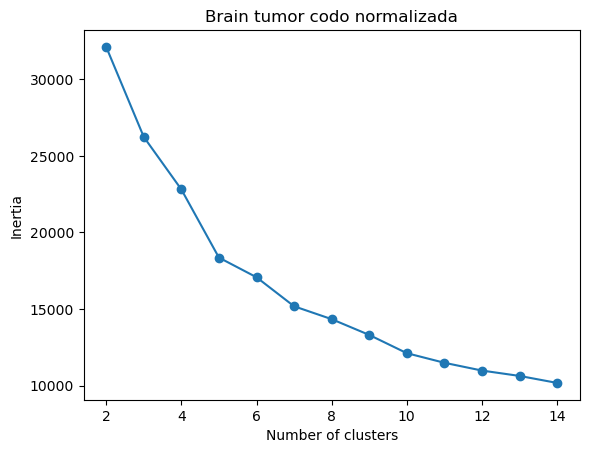

In [17]:
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters, n_init='auto')
    kmeans.fit(X_std_bt)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Brain tumor codo normalizada')
plt.show()  

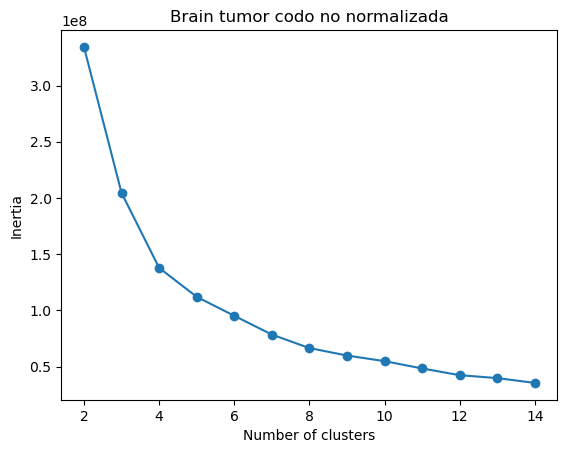

In [18]:
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Brain tumor codo no normalizada')
plt.show() 

Decidí probar con 4 clusters que es donde se ve más marcada en los datos no normalizados (si lo normalizamos los valores de 0 y 1 de class se pierden). También probaré con 2 clusters porque solo hay 0 y 1 en class tienes o no tienes tumor, podrían ser 4 si consideramos falsos positivos y negativos

In [19]:
print("Shape de X:", X.shape)
print("Longitud de etiquetas_bt:", len(etiquetas_bt))


Shape de X: (3762, 13)


NameError: name 'etiquetas_bt' is not defined

#### 4 clusters 

In [ ]:
kmeans_bt = KMeans(n_clusters=4)
kmeans_bt.fit(X)
centros_bt = kmeans_bt.cluster_centers_
etiquetas_bt = kmeans_bt.labels_
iteraciones_bt = kmeans_bt.n_iter_

print("Etiquetas:\n", etiquetas_bt)
print("Número de iteraciones:", iteraciones_bt)


X['kmeans_4'] = etiquetas_bt
X

/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Etiquetas:
 [3 3 1 ... 1 1 2]
Número de iteraciones: 36


,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,...,Hier_4,Hier_4_mapped,kmeans_2,kmeans_2_mapped,Gaussian_2,Gaussian_2_mapped,Hier_2,Hier_2_mapped,kmeans_4,kmeans_mapped_4
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,...,1,0,1,0,1,0,1,0,3,0
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,...,1,0,1,0,1,0,1,0,3,0
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,...,4,1,0,1,0,1,2,1,1,1
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,...,4,1,0,1,0,1,2,1,1,1
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,...,1,0,1,0,1,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,...,4,1,0,1,0,1,2,1,1,1
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,...,4,1,0,1,0,1,2,1,1,1
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,...,4,1,0,1,0,1,2,1,1,1
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,...,4,1,0,1,0,1,2,1,1,1


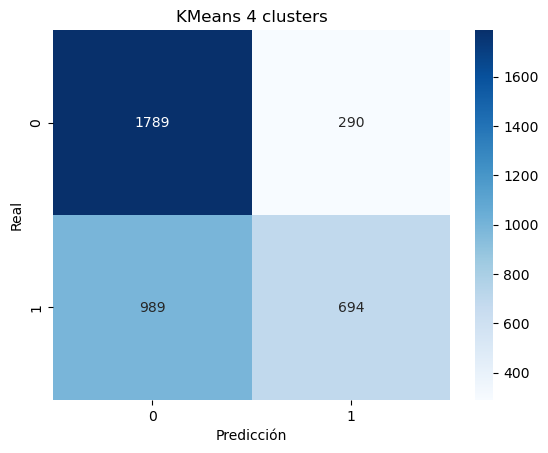

In [ ]:
def map_clusters_to_classes(cluster_labels, true_labels):
    # Convertir a arrays de NumPy 
    cluster_labels = np.array(cluster_labels)
    true_labels = np.array(true_labels)
    
    mapping = {}
    # Para cada cluster único en los resultados
    for cluster in np.unique(cluster_labels):
        # Extraer los valores verdaderos correspondientes al cluster
        true_vals = true_labels[cluster_labels == cluster]
        # Contar la frecuencia de cada clase 
        counts = np.bincount(true_vals)
        # Asignar la clase con mayor frecuencia
        mapping[cluster] = np.argmax(counts)
    return mapping

# Mapear los clusters a las clases reales
mapping = map_clusters_to_classes(X['kmeans_4'], X['Class'])

X['kmeans_mapped_4'] = X['kmeans_4'].map(mapping)

cm_kmeans = confusion_matrix(X['Class'], X['kmeans_mapped_4'],
                             labels=np.unique(X['Class']))

sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class'])).set_title('KMeans 4 clusters')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,...,Hier_4,Hier_4_mapped,kmeans_2,kmeans_2_mapped,Gaussian_2,Gaussian_2_mapped,Hier_2,Hier_2_mapped,kmeans_4,kmeans_mapped_4
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,...,1,0,1,0,1,0,1,0,3,0
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,...,1,0,1,0,1,0,1,0,3,0
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,...,4,1,0,1,0,1,2,1,1,1
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,...,4,1,0,1,0,1,2,1,1,1
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,...,1,0,1,0,1,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,...,4,1,0,1,0,1,2,1,1,1
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,...,4,1,0,1,0,1,2,1,1,1
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,...,4,1,0,1,0,1,2,1,1,1
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,...,4,1,0,1,0,1,2,1,1,1


In [ ]:
gm = GaussianMixture(n_components=4).fit(X)
labels = gm.predict(X)
X['Gaussian_4'] = labels
X 

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,...,Hier_4_mapped,kmeans_2,kmeans_2_mapped,Gaussian_2,Gaussian_2_mapped,Hier_2,Hier_2_mapped,kmeans_4,kmeans_mapped_4,Gaussian_4
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,...,0,1,0,1,0,1,0,3,0,1
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,...,0,1,0,1,0,1,0,3,0,1
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,...,1,0,1,0,1,2,1,1,1,0
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,...,1,0,1,0,1,2,1,1,1,0
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,...,0,1,0,1,0,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,...,1,0,1,0,1,2,1,1,1,0
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,...,1,0,1,0,1,2,1,1,1,0
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,...,1,0,1,0,1,2,1,1,1,0
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,...,1,0,1,0,1,2,1,1,1,0


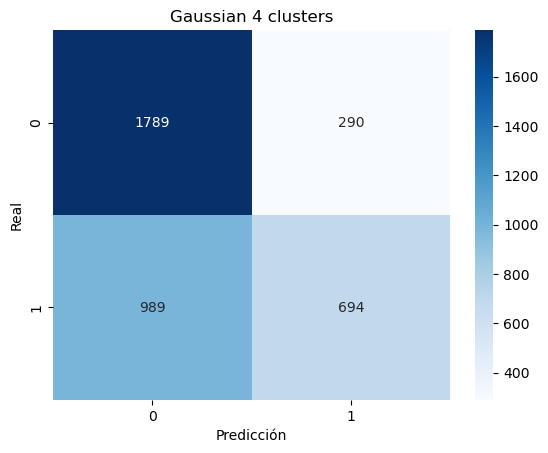

In [ ]:
mapping_gaussian = map_clusters_to_classes(X['Gaussian_4'], X['Class'])

X['Gaussian_mapped_4'] = X['Gaussian_4'].map(mapping_gaussian)

cm_gaussian = confusion_matrix(X['Class'], X['Gaussian_mapped_4'],
                               labels=np.unique(X['Class']))

sns.heatmap(cm_gaussian, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class'])).set_title('Gaussian 4 clusters')

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


[]

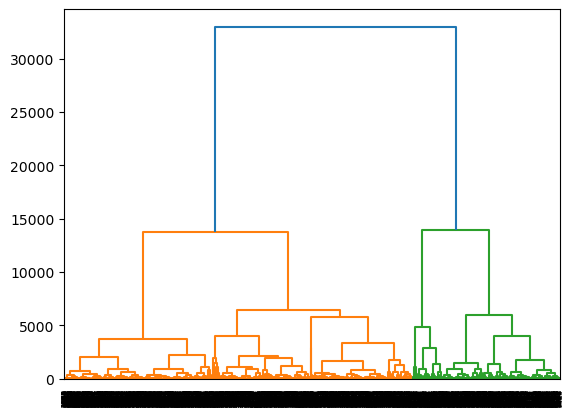

In [ ]:
Z = linkage(X, 'ward') # linkage method determines the distance between sets of observations
dendrogram(Z) # asi determinas como hizo el enlace 
# el dendograma va de abajo hacia arriba estas primero viendo los clusters mas cercanos 
# cad apunto es un cluster y luego calcula las distancias entre clusters 
# conforme bajas ves mas clusters 
plt.plot()

In [ ]:
Jer_4 = fcluster(Z, t=4, criterion='maxclust')

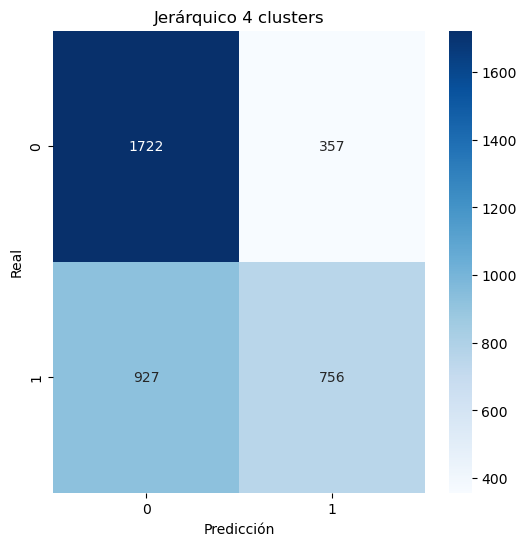

In [ ]:
X['Jer_4'] = Jer_4
mapping_jer_4 = map_clusters_to_classes(X['Jer_4'], X['Class'])

X['Jer_4_mapped'] = X['Jer_4'].map(mapping_jer_4)

cm_hier_4 = confusion_matrix(X['Class'], X['Jer_4_mapped'], labels=np.unique(X['Class']))
plt.figure(figsize=(6,6))
sns.heatmap(cm_hier_4, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']))
plt.title('Jerárquico 4 clusters')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

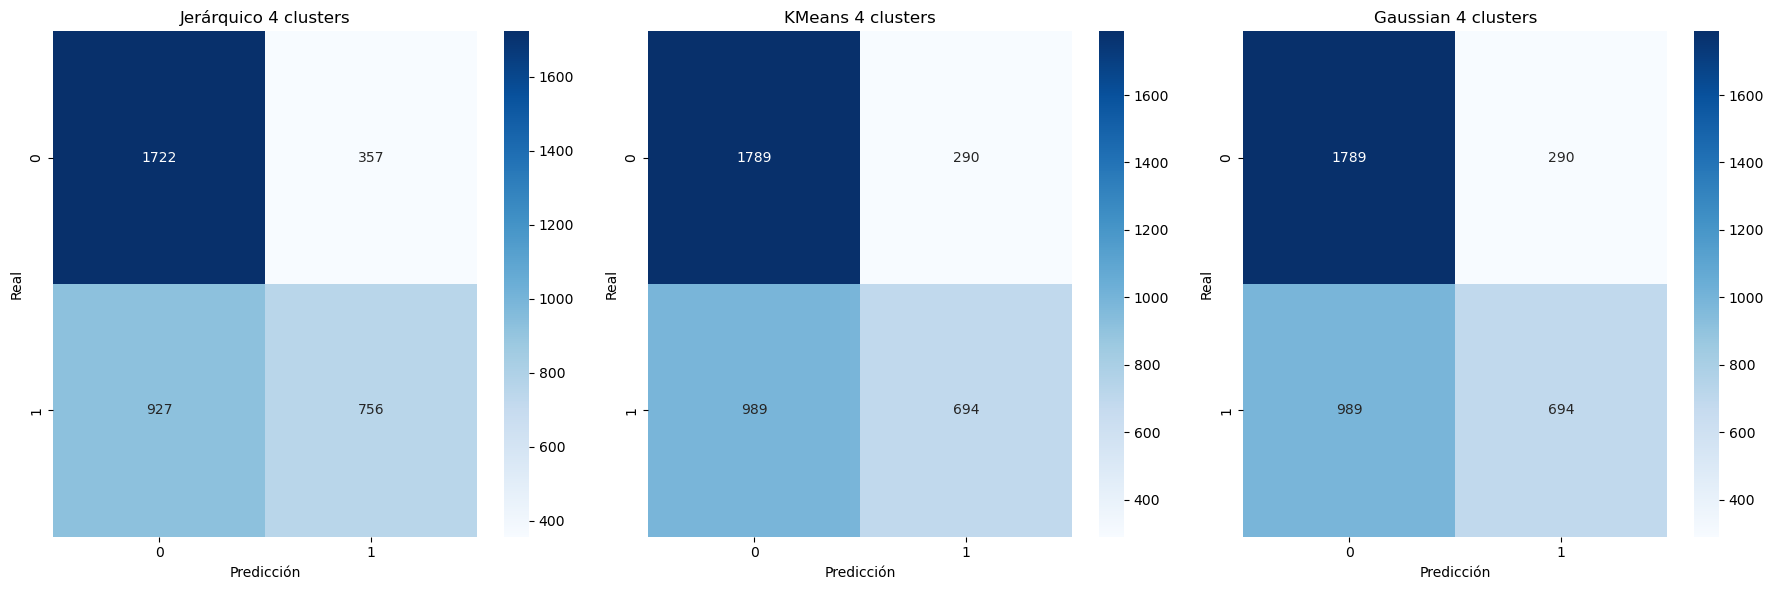

In [ ]:
# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar la matriz de confusión para el clustering jerárquico (4 clusters)
sns.heatmap(cm_hier_4, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']), ax=axes[0])
axes[0].set_title('Jerárquico 4 clusters')
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")


# Graficar la matriz de confusión para KMeans (4 clusters)
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']), ax=axes[1])
axes[1].set_title('KMeans 4 clusters')
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")


# Graficar la matriz de confusión para Gaussian Mixture (4 clusters)
sns.heatmap(cm_gaussian, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']), ax=axes[2])
axes[2].set_title('Gaussian 4 clusters')
axes[2].set_xlabel("Predicción")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()

In [ ]:
X

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,...,Hier_2,Hier_2_mapped,kmeans_4,kmeans_mapped_4,Gaussian_4,Gaussian_mapped_4,Jer_4,Jer_4_mapped,Jer_2,Jer_2_mapped
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,...,1,0,3,0,1,0,1,0,1,0
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,...,1,0,3,0,1,0,1,0,1,0
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,...,2,1,1,1,0,1,4,1,2,1
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,...,2,1,1,1,0,1,4,1,2,1
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,...,1,0,3,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,...,2,1,1,1,0,1,4,1,2,1
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,...,2,1,1,1,0,1,4,1,2,1
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,...,2,1,1,1,0,1,4,1,2,1
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,...,2,1,1,1,0,1,4,1,2,1


#### 2 clusters 

/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


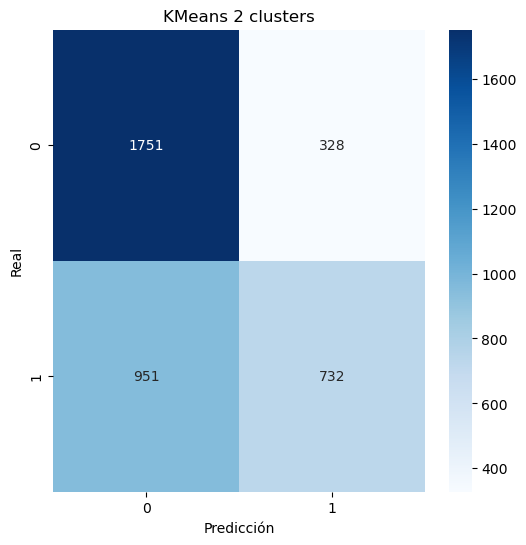

Etiquetas:
 [1 1 0 ... 0 0 1]
Número de iteraciones: 8


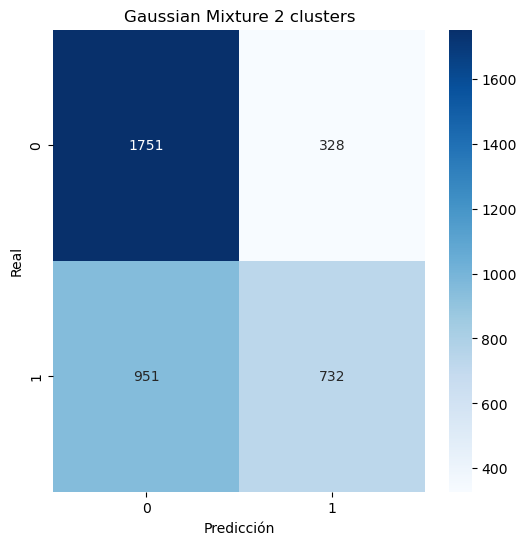

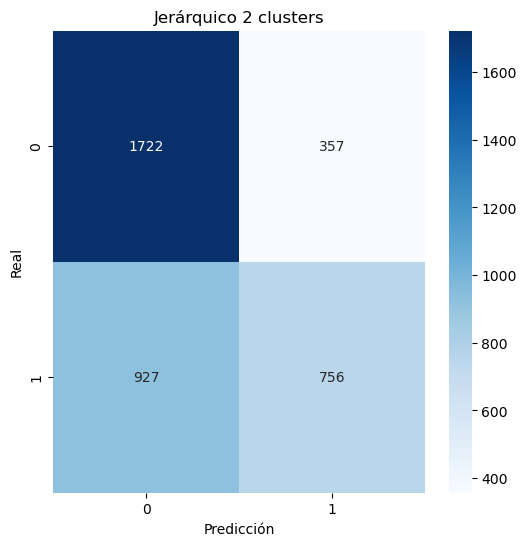

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, fcluster

# mapear clusters 
def map_clusters_to_binary(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        true_in_cluster = true_labels[cluster_labels == cluster] # si se va hacia el 1 o 0 
        counts = np.bincount(true_in_cluster)
        mapping[cluster] = np.argmax(counts)
    return mapping

# KMeans (2 clusters)
kmeans_bt_2 = KMeans(n_clusters=2, random_state=42)
kmeans_bt_2.fit(X)  # Ajustar KMeans
etiquetas_bt_2 = kmeans_bt_2.labels_
centros_bt_2 = kmeans_bt_2.cluster_centers_
iteraciones_bt_2 = kmeans_bt_2.n_iter_


X['kmeans_2'] = etiquetas_bt_2  # Etiquetas para 2 clusters

# Mapeo de clusters a 0 y 1
mapping_kmeans_2 = map_clusters_to_binary(X['kmeans_2'], X['Class'])
X['kmeans_2_mapped'] = X['kmeans_2'].map(mapping_kmeans_2)

# Calcular la matriz de confusión para KMeans 2 clusters
cm_kmeans_2 = confusion_matrix(X['Class'], X['kmeans_2_mapped'],
                               labels=np.unique(X['Class']))

# Graficar la matriz de confusión para KMeans 2 clusters
plt.figure(figsize=(6,6))
sns.heatmap(cm_kmeans_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class'])).set_title('KMeans 2 clusters')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

print("Etiquetas:\n", etiquetas_bt_2)
print("Número de iteraciones:", iteraciones_bt_2)




# Gaussian Mixture (2 clusters)
gm_2 = GaussianMixture(n_components=2, random_state=42)
gm_2.fit(X)

labels_2 = gm_2.predict(X)

X['Gaussian_2'] = labels_2  # Etiquetas para 2 clusters

mapping_gaussian_2 = map_clusters_to_binary(X['Gaussian_2'], X['Class'])
X['Gaussian_2_mapped'] = X['Gaussian_2'].map(mapping_gaussian_2)

cm_gaussian_2 = confusion_matrix(X['Class'], X['Gaussian_2_mapped'],
                                 labels=np.unique(X['Class']))

plt.figure(figsize=(6,6))
sns.heatmap(cm_gaussian_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class'])).set_title('Gaussian Mixture 2 clusters')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# Clustering Jerárquico (2 clusters)
Z = linkage(X, method='ward')
labels_hier_2 = fcluster(Z, t=2, criterion='maxclust')

X['Jer_2'] = labels_hier_2  # Etiquetas para 2 clusters

# Mapeo de clusters a 0 y 1 para Clustering Jerárquico
mapping_hier_2 = map_clusters_to_binary(X['Jer_2'], X['Class'])
X['Jer_2_mapped'] = X['Jer_2'].map(mapping_hier_2)

# Calcular la matriz de confusión para Clustering Jerárquico 2 clusters
cm_hier_2 = confusion_matrix(X['Class'], X['Jer_2_mapped'],
                             labels=np.unique(X['Class']))

# Graficar la matriz de confusión para Clustering Jerárquico 2 clusters
plt.figure(figsize=(6,6))
sns.heatmap(cm_hier_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class'])).set_title('Jerárquico 2 clusters')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


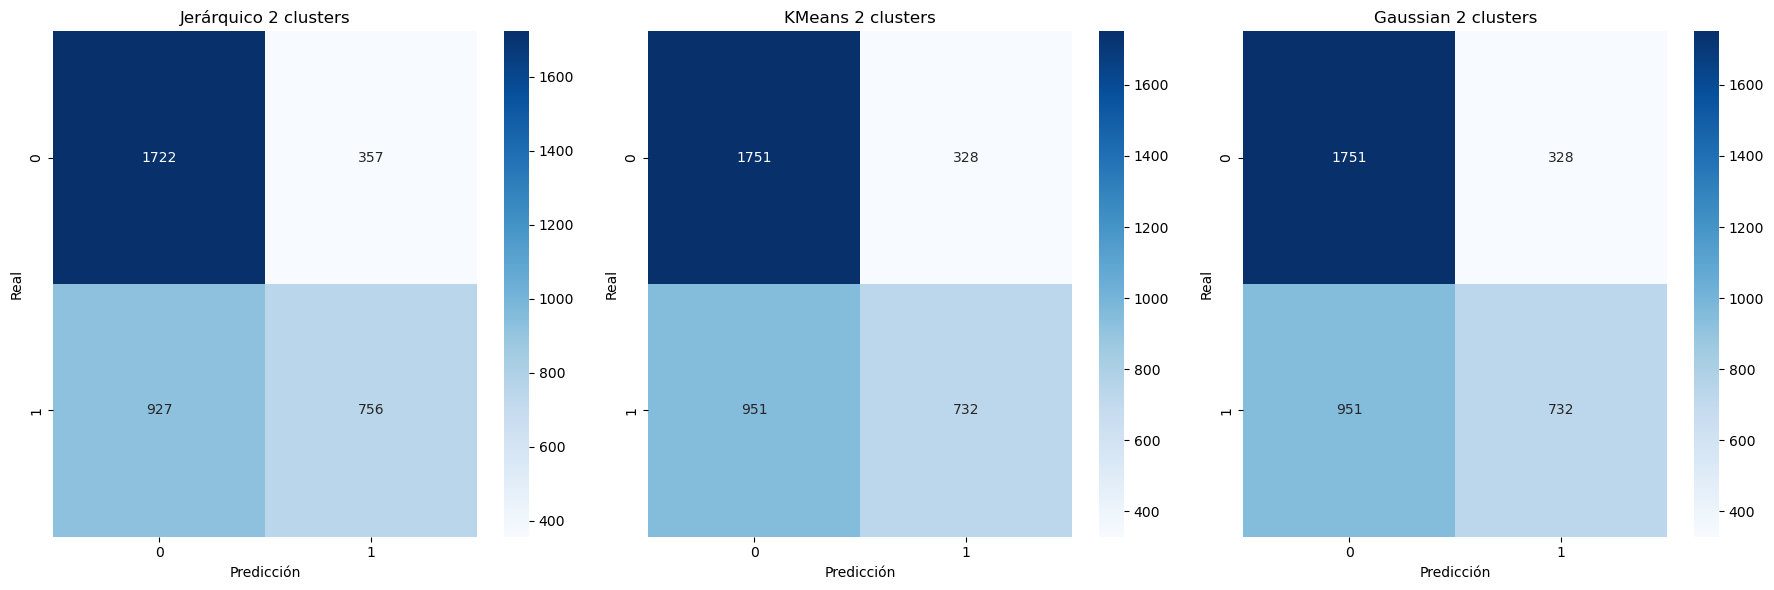

In [ ]:
# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar la matriz de confusión para el clustering jerárquico (4 clusters)
sns.heatmap(cm_hier_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']), ax=axes[0])
axes[0].set_title('Jerárquico 2 clusters')
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")


# Graficar la matriz de confusión para KMeans (4 clusters)
sns.heatmap(cm_kmeans_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']), ax=axes[1])
axes[1].set_title('KMeans 2 clusters')
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")


# Graficar la matriz de confusión para Gaussian Mixture (4 clusters)
sns.heatmap(cm_gaussian_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']), ax=axes[2])
axes[2].set_title('Gaussian 2 clusters')
axes[2].set_xlabel("Predicción")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()

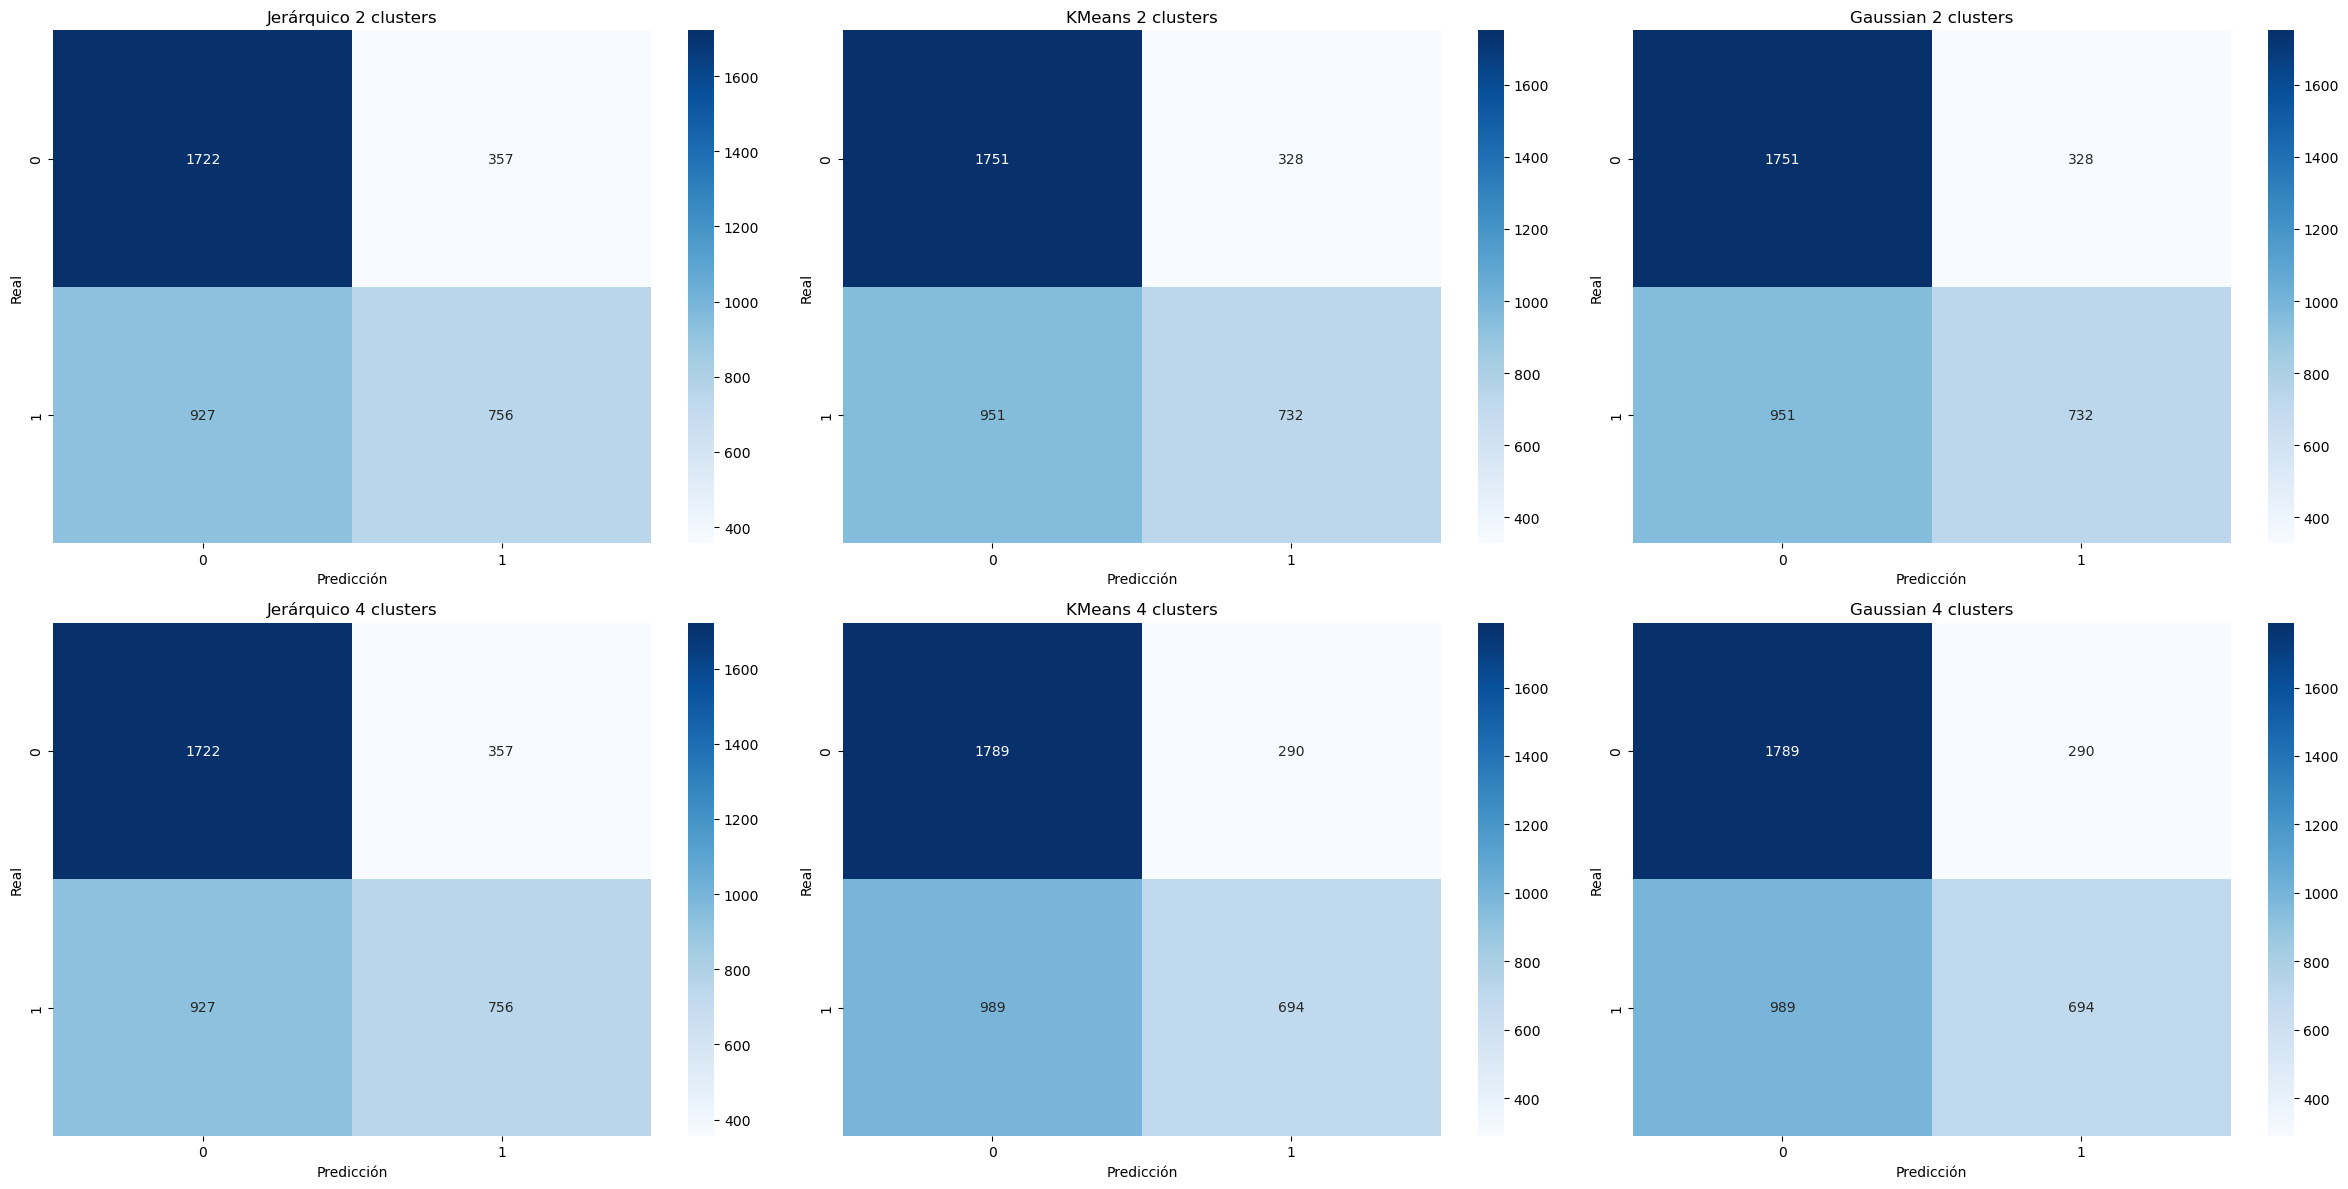

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# ------------------ Primera fila: 2 clusters ------------------

sns.heatmap(cm_hier_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']),
            ax=axes[0, 0])
axes[0, 0].set_title('Jerárquico 2 clusters')
axes[0, 0].set_xlabel("Predicción")
axes[0, 0].set_ylabel("Real")

sns.heatmap(cm_kmeans_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']),
            ax=axes[0, 1])
axes[0, 1].set_title('KMeans 2 clusters')
axes[0, 1].set_xlabel("Predicción")
axes[0, 1].set_ylabel("Real")

sns.heatmap(cm_gaussian_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']),
            ax=axes[0, 2])
axes[0, 2].set_title('Gaussian 2 clusters')
axes[0, 2].set_xlabel("Predicción")
axes[0, 2].set_ylabel("Real")

# ------------------ Segunda fila: 4 clusters ------------------

sns.heatmap(cm_hier_4, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']),
            ax=axes[1, 0])
axes[1, 0].set_title('Jerárquico 4 clusters')
axes[1, 0].set_xlabel("Predicción")
axes[1, 0].set_ylabel("Real")

sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']),
            ax=axes[1, 1])
axes[1, 1].set_title('KMeans 4 clusters')
axes[1, 1].set_xlabel("Predicción")
axes[1, 1].set_ylabel("Real")

sns.heatmap(cm_gaussian, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(X['Class']),
            yticklabels=np.unique(X['Class']),
            ax=axes[1, 2])
axes[1, 2].set_title('Gaussian 4 clusters')
axes[1, 2].set_xlabel("Predicción")
axes[1, 2].set_ylabel("Real")

plt.tight_layout()
plt.show()


Parece ser que el número de clusters es 2 porque en class solo existen los valores 0 y 1, predice igual para gaussian que para kmeans, el peor sigue siendo jerárquico al menos en este dataset. Al final no fueron 4 clusters, yo había considerado falsos positivos y negativos, además de que como solo tenemos 0 y 1 en class es necesario mapearlo para que del 0-3 se asigne entre 1 o 2 dependiendo de cual es el valor más cercano 

In [ ]:
X

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,...,Hier_2,Hier_2_mapped,kmeans_4,kmeans_mapped_4,Gaussian_4,Gaussian_mapped_4,Jer_4,Jer_4_mapped,Jer_2,Jer_2_mapped
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,...,1,0,3,0,1,0,1,0,1,0
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,...,1,0,3,0,1,0,1,0,1,0
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,...,2,1,1,1,0,1,4,1,2,1
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,...,2,1,1,1,0,1,4,1,2,1
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,...,1,0,3,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,...,2,1,1,1,0,1,4,1,2,1
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,...,2,1,1,1,0,1,4,1,2,1
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,...,2,1,1,1,0,1,4,1,2,1
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,...,2,1,1,1,0,1,4,1,2,1


In [ ]:
print(X['Gaussian_2'])

0       1
1       1
2       0
3       0
4       1
       ..
3757    0
3758    0
3759    0
3760    0
3761    1
Name: Gaussian_2, Length: 3762, dtype: int64


In [ ]:
print("KMeans 2 clusters:", np.unique(X['kmeans_2']))
print("Gaussian 2 clusters:", np.unique(X['Gaussian_2']))
print("Jerárquico 2 clusters:", np.unique(X['Jer_2']))


KMeans 2 clusters: [0 1]
Gaussian 2 clusters: [0 1]
Jerárquico 2 clusters: [1 2]


### De su previa investigación:

- qué es precision?
- qué es accuracy?
- qué es recall?
- qué es f1-score?

- Precisión: es la proporción de verdaderos positivos (casos correctamente clasificados como positivos) respecto al total de ejemplos clasificados como positivos (la suma de verdaderos positivos y falsos positivos).
    - De todos los casos que el modelo clasificó como positivos, ¿cuántos realmente lo son?
    - Una precisión alta indica que cuando el modelo predice positivo, es probable que lo sea
- Accuracy: es la proporción de predicciones correctas (la suma de verdaderos positivos y verdaderos negativos) respecto al total de muestras.
    - Esta métrica nos indica el porcentaje de casos en los que el modelo se equivocó o acertó. Es útil cuando las clases están balanceadas, pero puede resultar engañosa si hay un desbalance en las clases.
- Recall: es la proporción de verdaderos positivos respecto al total de casos que realmente son positivos (la suma de verdaderos positivos y falsos negativos).
    - De todos los casos positivos reales, ¿cuántos logró identificar correctamente el modelo?
- F1-score: es la media armónica entre la precisión y el recall. Se utiliza cuando se quiere un balance entre ambas métricas, especialmente en escenarios donde se tiene un desbalance de clases.
    - El F1-score es útil porque considera tanto la precisión como el recall en una única métrica. Un valor alto de F1-score indica que el modelo tiene tanto buena precisión como buena capacidad para recuperar los positivos.

### Cómo se relacionan las definiciones anteriores a la matriz de confusión?

La matriz de confusión calcula todas estas métricas, organiza las predicciones del modelo en funsión de las clases reales. Tenemos 4 valores clave 
- Verdaderos Positivos (TP): Casos positivos correctamente clasificados.
- Falsos Positivos (FP): Casos negativos que fueron incorrectamente clasificados como positivos.
- Falsos Negativos (FN): Casos positivos que fueron incorrectamente clasificados como negativos.
- Verdaderos Negativos (TN): Casos negativos correctamente clasificados.

Por lo tanto 
- Precisión: mide true positive en relación con true positive + false positive 
- Accuracy: mide true positive + true negative / TP + TN + FP + FN
- Recall: mide true positive / TP + FN 
- F1-score: multiplica por dos TP / 2TP + FP + FN

### A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score
#### Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth

In [ ]:
X

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,...,Hier_2,Hier_2_mapped,kmeans_4,kmeans_mapped_4,Gaussian_4,Gaussian_mapped_4,Jer_4,Jer_4_mapped,Jer_2,Jer_2_mapped
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,...,1,0,3,0,1,0,1,0,1,0
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,...,1,0,3,0,1,0,1,0,1,0
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,...,2,1,1,1,0,1,4,1,2,1
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,...,2,1,1,1,0,1,4,1,2,1
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,...,1,0,3,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,...,2,1,1,1,0,1,4,1,2,1
3758,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,...,2,1,1,1,0,1,4,1,2,1
3759,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,...,2,1,1,1,0,1,4,1,2,1
3760,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,...,2,1,1,1,0,1,4,1,2,1


In [ ]:
X.columns

Index(['Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'kmeans', 'kmeans_mapped', 'Gaussian',
       'Gaussian_mapped', 'Hier_4', 'Hier_4_mapped', 'kmeans_2',
       'kmeans_2_mapped', 'Gaussian_2', 'Gaussian_2_mapped', 'Hier_2',
       'Hier_2_mapped', 'kmeans_4', 'kmeans_mapped_4', 'Gaussian_4',
       'Gaussian_mapped_4', 'Jer_4', 'Jer_4_mapped', 'Jer_2', 'Jer_2_mapped'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_clustering(y_true, labels, model_name):
    # Ajuste de etiquetas en caso de inversión (común en KMeans o GMM)
    if np.mean(y_true == labels) < 0.5:
        labels = 1 - labels
    
    # Cálculo de las métricas
    accuracy = accuracy_score(y_true, labels)
    precision = precision_score(y_true, labels, average='macro')
    recall = recall_score(y_true, labels, average='macro')
    f1 = f1_score(y_true, labels, average='macro')
    
    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# Usamos la columna "Class" del DataFrame X para evaluar
evaluate_clustering(X['Class'], X['kmeans_2'], "KMeans")
evaluate_clustering(X['Class'], X['Gaussian_2'], "Gaussian Mixture")
evaluate_clustering(X['Class'], X['Jer_2'], "Clustering Jerárquico")



--- KMeans ---
Accuracy:  0.6600
Precision: 0.6693
Recall:    0.6386
F1-Score:  0.6331

--- Gaussian Mixture ---
Accuracy:  0.6600
Precision: 0.6693
Recall:    0.6386
F1-Score:  0.6331

--- Clustering Jerárquico ---
Accuracy:  0.4577
Precision: 0.2167
Recall:    0.2761
F1-Score:  0.2428


/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X['Jer_2']

0       1
1       1
2       2
3       2
4       1
       ..
3757    2
3758    2
3759    2
3760    2
3761    1
Name: Jer_2, Length: 3762, dtype: int32